In [ ]:
## https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis?resource=download&select=twitter_validation.csv
#

In [25]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/0a/18/c797c9b8c10380d05616db3bfb48e2a3358c767affd0857d56c2eb501caa/scikit_learn-1.6.1-cp312-cp312-macosx_10_13_x86_64.whl.metadata


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import re
import string

In [27]:
train_df = pd.read_csv('twitter_training.csv', header=None, names=['id', 'entity', 'sentiment', 'tweet'])
val_df = pd.read_csv('twitter_validation.csv', header=None, names=['id', 'entity', 'sentiment', 'tweet'])

df = pd.concat([train_df, val_df], ignore_index=True)

# Filter out "Irrelevant" or non-standard labels
df = df[df['sentiment'].isin(['Positive', 'Negative'])]

In [28]:
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r"http\S+|www\S+|https\S+", '', text)
        text = re.sub(r'\@\w+|\#','', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)
        return text
    else:
        return ""

print(df['tweet'].isnull().sum())  # Count of NaN values
print(df[~df['tweet'].apply(lambda x: isinstance(x, str))])  # Non-string rows

df['clean_tweet'] = df['tweet'].apply(clean_text)


df['label'] = df['sentiment'].map({'Positive': 1, 'Negative': 0})

361
         id                     entity sentiment tweet
745    2532                Borderlands  Positive   NaN
1105   2595                Borderlands  Positive   NaN
1106   2595                Borderlands  Positive   NaN
2413   1622  CallOfDutyBlackopsColdWar  Negative   NaN
2929   1708  CallOfDutyBlackopsColdWar  Positive   NaN
...     ...                        ...       ...   ...
73972  9073                     Nvidia  Positive   NaN
73973  9073                     Nvidia  Positive   NaN
74421  9154                     Nvidia  Positive   NaN
74422  9154                     Nvidia  Positive   NaN
74423  9154                     Nvidia  Positive   NaN

[361 rows x 4 columns]


In [29]:
X = df['clean_tweet']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8574681238615665

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      4562
           1       0.86      0.83      0.85      4222

    accuracy                           0.86      8784
   macro avg       0.86      0.86      0.86      8784
weighted avg       0.86      0.86      0.86      8784



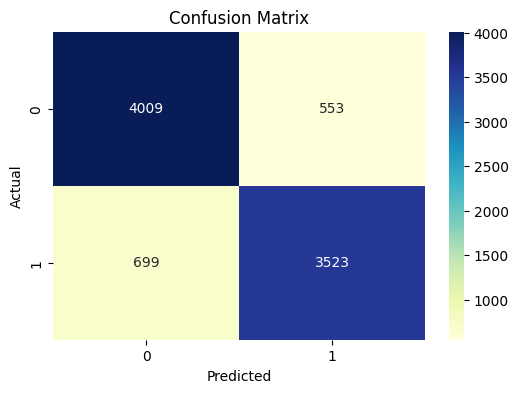

In [31]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
